In [5]:
data  = {
    "Brand" :[],
    "Material" : [],
    "Rating" : [],
    "Ratings & Reviews" : [],
    "Price" : [],
    "MRP" : [],
    "Offer" : [],
    
}

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd


for pg in range(1,20):
    url = f"https://www.flipkart.com/search?q=branded+jewellery+set&sid=mcr%2C96v%2Cyx2&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=branded+jewellery+set%7CJewellery+Sets&requestId=4af803d7-c3d7-4daa-8bbe-a54cfd4e8f5c&as-searchtext=jewllery+brands&page={pg}"
    code = requests.get(url).text
    soup = BeautifulSoup(code,"html.parser")

    cards = soup.find_all(attrs={"style": "width:25%"})
    for card in cards:
        link = r"https://www.flipkart.com"+card.find("a")["href"]
        card_code = requests.get(link).text
        card_soup = BeautifulSoup(card_code,"html.parser")

        try:
            brand = card_soup.select_one("h1._6EBuvT > span.mEh187").text
        except:
            brand = np.nan
            
        try:
            Material = card_soup.select_one("h1._6EBuvT > span.VU-ZEz").text
        except:
            Material = np.nan

        try:
            rating = card_soup.select_one("div.XQDdHH").text
        except:
            rating = np.nan

        try:
            ratings_and_reviews = card_soup.select_one("span.Wphh3N").text
        except:
            ratings_and_reviews = np.nan
        
        try:
            price = card_soup.find(attrs={"class":"Nx9bqj CxhGGd"}).text
        except:
            price = np.nan
        
        try:
            mrp = card_soup.find(attrs={"class":"yRaY8j A6+E6v"}).text
        except:
            mrp = np.nan
        
        
        try:
            offer = card_soup.find(attrs={"class":"UkUFwK WW8yVX dB67CR"}).text
        except:
            offer = np.nan
        

        
        # Append
        data["Brand"].append(brand)
        data["Material"].append(Material)
        data["Rating"].append(rating)
        data["Ratings & Reviews"].append(ratings_and_reviews)
        data["Price"].append(price)
        data["MRP"].append(mrp)
        data["Offer"].append(offer)
        
        # data["Highlights"].append(extra)
    

df = pd.DataFrame(data)
df.to_csv("Data.csv",index=False)

In [7]:
import re
def color(x):
    if not isinstance(x, str):  
        return np.nan 
    
    pat = r"\b(Gold|Silver|Blue|White|Pink|Green|Red|Maroon|Black|Yellow|Purple|Multicolor|Rose Gold|Brown|Grey|Orange)\b"
    t = re.findall(pat,x)
    if len(t)>0:
        t = t[0]
        return t
    else:
        return np.nan

df["Color"] = df["Material"].apply(color)

In [9]:
df

,Brand,Material,Rating,Ratings & Reviews,Price,MRP,Offer,Color
0,brado jewellery,"Brass Silver, Gold-plated Pink Jewel Set (Pac...",3.9,"10,229 ratings and 535 reviews",₹245,"₹1,999",87% off,Silver
1,brado jewellery,"Brass Silver, Gold-plated Rose Gold, White, Pi...",3.9,"10,229 ratings and 535 reviews",₹234,"₹1,299",81% off,Silver
2,Sukkhi,Alloy Gold-plated Gold Jewel Set (Pack of 2),3.8,"9,821 ratings and 322 reviews",₹519,"₹5,129",89% off,Gold
3,RUBANS,Alloy Gold-plated Gold Jewel Set (Pack of 1),3.5,NaN,₹992,"₹4,634",78% off,Gold
4,Rhosyn,"Alloy Gold-plated Rose Gold, White Jewel Set ...",4,202 ratings and 15 reviews,₹109,₹999,89% off,Gold
...,...,...,...,...,...,...,...,...
755,Geesa,"Alloy Black, Multicolor Jewel Set (Pack of 1)",4.6,11 ratings and 0 reviews,₹258,₹900,71% off,Black
756,brado jewellery,"Brass Gold-plated Gold, Black Jewel Set (Pack...",4,"7,128 ratings and 422 reviews",₹226,₹999,77% off,Gold
757,TONOLIKA JEWELLERY,Metal Gold-plated Gold Jewel Set (Pack of 1),3.7,82 ratings and 3 reviews,₹236,"₹1,499",84% off,Gold
758,RUBANS,Alloy Rose Gold Jewel Set (Pack of 1),4.1,8 ratings and 0 reviews,"₹1,244","₹3,795",67% off,Rose Gold


In [11]:
import re
import numpy as np

def Material(x):
    if not isinstance(x, str):  # Check if x is not a string (e.g., NaN)
        return np.nan  # Return NaN directly

    pat = r"\b(Gold|Gold-plated|CHIMESMeta|Rhodium|Brass|Alloy|Copper|Silver|Metal|Stainless Steel)\b"
    t = re.findall(pat, x)
    
    return t[0] if t else np.nan  # Return first match or NaN

df["Material"] = df["Material"].apply(Material)

In [13]:
df

,Brand,Material,Rating,Ratings & Reviews,Price,MRP,Offer,Color
0,brado jewellery,Brass,3.9,"10,229 ratings and 535 reviews",₹245,"₹1,999",87% off,Silver
1,brado jewellery,Brass,3.9,"10,229 ratings and 535 reviews",₹234,"₹1,299",81% off,Silver
2,Sukkhi,Alloy,3.8,"9,821 ratings and 322 reviews",₹519,"₹5,129",89% off,Gold
3,RUBANS,Alloy,3.5,NaN,₹992,"₹4,634",78% off,Gold
4,Rhosyn,Alloy,4,202 ratings and 15 reviews,₹109,₹999,89% off,Gold
...,...,...,...,...,...,...,...,...
755,Geesa,Alloy,4.6,11 ratings and 0 reviews,₹258,₹900,71% off,Black
756,brado jewellery,Brass,4,"7,128 ratings and 422 reviews",₹226,₹999,77% off,Gold
757,TONOLIKA JEWELLERY,Metal,3.7,82 ratings and 3 reviews,₹236,"₹1,499",84% off,Gold
758,RUBANS,Alloy,4.1,8 ratings and 0 reviews,"₹1,244","₹3,795",67% off,Rose Gold


In [15]:
df["Ratings & Reviews"].fillna("- and -",inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16748\3852110281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ratings & Reviews"].fillna("- and -",inplace=True)


In [17]:
df[["Ratings","Reviews"]] = df["Ratings & Reviews"].str.split("and").tolist()

In [19]:
df

,Brand,Material,Rating,Ratings & Reviews,Price,MRP,Offer,Color,Ratings,Reviews
0,brado jewellery,Brass,3.9,"10,229 ratings and 535 reviews",₹245,"₹1,999",87% off,Silver,"10,229 ratings",535 reviews
1,brado jewellery,Brass,3.9,"10,229 ratings and 535 reviews",₹234,"₹1,299",81% off,Silver,"10,229 ratings",535 reviews
2,Sukkhi,Alloy,3.8,"9,821 ratings and 322 reviews",₹519,"₹5,129",89% off,Gold,"9,821 ratings",322 reviews
3,RUBANS,Alloy,3.5,- and -,₹992,"₹4,634",78% off,Gold,-,-
4,Rhosyn,Alloy,4,202 ratings and 15 reviews,₹109,₹999,89% off,Gold,202 ratings,15 reviews
...,...,...,...,...,...,...,...,...,...,...
755,Geesa,Alloy,4.6,11 ratings and 0 reviews,₹258,₹900,71% off,Black,11 ratings,0 reviews
756,brado jewellery,Brass,4,"7,128 ratings and 422 reviews",₹226,₹999,77% off,Gold,"7,128 ratings",422 reviews
757,TONOLIKA JEWELLERY,Metal,3.7,82 ratings and 3 reviews,₹236,"₹1,499",84% off,Gold,82 ratings,3 reviews
758,RUBANS,Alloy,4.1,8 ratings and 0 reviews,"₹1,244","₹3,795",67% off,Rose Gold,8 ratings,0 reviews


In [21]:
df.drop(columns=['Ratings & Reviews'],inplace=True)

In [23]:
df

,Brand,Material,Rating,Price,MRP,Offer,Color,Ratings,Reviews
0,brado jewellery,Brass,3.9,₹245,"₹1,999",87% off,Silver,"10,229 ratings",535 reviews
1,brado jewellery,Brass,3.9,₹234,"₹1,299",81% off,Silver,"10,229 ratings",535 reviews
2,Sukkhi,Alloy,3.8,₹519,"₹5,129",89% off,Gold,"9,821 ratings",322 reviews
3,RUBANS,Alloy,3.5,₹992,"₹4,634",78% off,Gold,-,-
4,Rhosyn,Alloy,4,₹109,₹999,89% off,Gold,202 ratings,15 reviews
...,...,...,...,...,...,...,...,...,...
755,Geesa,Alloy,4.6,₹258,₹900,71% off,Black,11 ratings,0 reviews
756,brado jewellery,Brass,4,₹226,₹999,77% off,Gold,"7,128 ratings",422 reviews
757,TONOLIKA JEWELLERY,Metal,3.7,₹236,"₹1,499",84% off,Gold,82 ratings,3 reviews
758,RUBANS,Alloy,4.1,"₹1,244","₹3,795",67% off,Rose Gold,8 ratings,0 reviews


In [25]:
df.isna().sum()

Brand       24
Material    34
Rating      28
Price       24
MRP         25
Offer       25
Color       24
Ratings      0
Reviews      0
dtype: int64

In [27]:
df = df.dropna(subset=['MRP']).reset_index(drop=True)


In [29]:
df['MRP'].isna().sum()

0

In [31]:
df.isna().sum()

Brand        0
Material    10
Rating       3
Price        0
MRP          0
Offer        0
Color        0
Ratings      0
Reviews      0
dtype: int64

In [33]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

                   Brand Material Rating   Price     MRP    Offer       Color  \
70          saadgallery       NaN    4.1    ₹162  ₹1,299  87% off       White   
181    Vindaa Ecommerce       NaN      4    ₹217    ₹900  75% off       Green   
235           Kesarwani     Brass    NaN  ₹2,799  ₹3,000   6% off        Gold   
282             kripalu       NaN    3.7    ₹174  ₹1,999  91% off      Yellow   
310  UVX fashion & tech       NaN    4.1    ₹295  ₹1,299  77% off      Yellow   
333               Daizy       NaN    3.6    ₹198    ₹219   9% off         Red   
389         Mk Jewelery     Alloy    NaN    ₹225    ₹699  67% off        Gold   
400          AKS Jewelz       NaN      4    ₹155    ₹299  48% off  Multicolor   
443              VIVAAN       NaN      4    ₹128    ₹299  57% off        Blue   
603         DebapriyaPC       NaN    3.5    ₹300    ₹500  40% off      Yellow   
691  UVX fashion & tech       NaN    3.7    ₹697  ₹1,899  63% off         Red   
705       RADHIKASTORES     

In [35]:
df['Material'].fillna(df['Material'].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16748\383991150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Material'].fillna(df['Material'].mode()[0], inplace=True)


In [37]:
df

,Brand,Material,Rating,Price,MRP,Offer,Color,Ratings,Reviews
0,brado jewellery,Brass,3.9,₹245,"₹1,999",87% off,Silver,"10,229 ratings",535 reviews
1,brado jewellery,Brass,3.9,₹234,"₹1,299",81% off,Silver,"10,229 ratings",535 reviews
2,Sukkhi,Alloy,3.8,₹519,"₹5,129",89% off,Gold,"9,821 ratings",322 reviews
3,RUBANS,Alloy,3.5,₹992,"₹4,634",78% off,Gold,-,-
4,Rhosyn,Alloy,4,₹109,₹999,89% off,Gold,202 ratings,15 reviews
...,...,...,...,...,...,...,...,...,...
730,Geesa,Alloy,4.6,₹258,₹900,71% off,Black,11 ratings,0 reviews
731,brado jewellery,Brass,4,₹226,₹999,77% off,Gold,"7,128 ratings",422 reviews
732,TONOLIKA JEWELLERY,Metal,3.7,₹236,"₹1,499",84% off,Gold,82 ratings,3 reviews
733,RUBANS,Alloy,4.1,"₹1,244","₹3,795",67% off,Rose Gold,8 ratings,0 reviews


In [39]:
df['Material'].isna().sum()

0

In [41]:
count = (df['Material'] == 'Alloy').sum()
print(count)


367


In [43]:
mode_value = df['Material'].mode()[0] 
mode_value

'Alloy'

In [45]:
df['Rating']=df['Rating'].astype('float')

In [47]:
df['Rating'].dtype


dtype('float64')

In [49]:
df.dtypes

Brand        object
Material     object
Rating      float64
Price        object
MRP          object
Offer        object
Color        object
Ratings      object
Reviews      object
dtype: object

In [51]:
df['Rating']=df['Rating'].fillna(0)

In [53]:
df['Rating'].isna().sum()

0

In [55]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Brand, Material, Rating, Price, MRP, Offer, Color, Ratings, Reviews]
Index: []


In [57]:
df.isna().sum()

Brand       0
Material    0
Rating      0
Price       0
MRP         0
Offer       0
Color       0
Ratings     0
Reviews     0
dtype: int64

In [59]:
df['Ratings'] = df['Ratings'].astype(str).str.replace('ratings', '')
df['Reviews'] = df['Reviews'].astype(str).str.replace('reviews', '')



In [61]:
df

,Brand,Material,Rating,Price,MRP,Offer,Color,Ratings,Reviews
0,brado jewellery,Brass,3.9,₹245,"₹1,999",87% off,Silver,"10,229",535
1,brado jewellery,Brass,3.9,₹234,"₹1,299",81% off,Silver,"10,229",535
2,Sukkhi,Alloy,3.8,₹519,"₹5,129",89% off,Gold,"9,821",322
3,RUBANS,Alloy,3.5,₹992,"₹4,634",78% off,Gold,-,-
4,Rhosyn,Alloy,4.0,₹109,₹999,89% off,Gold,202,15
...,...,...,...,...,...,...,...,...,...
730,Geesa,Alloy,4.6,₹258,₹900,71% off,Black,11,0
731,brado jewellery,Brass,4.0,₹226,₹999,77% off,Gold,"7,128",422
732,TONOLIKA JEWELLERY,Metal,3.7,₹236,"₹1,499",84% off,Gold,82,3
733,RUBANS,Alloy,4.1,"₹1,244","₹3,795",67% off,Rose Gold,8,0


In [63]:
df['Brand']=df['Brand'].astype('category')

In [65]:
df['Price'] = df['Price'].astype(str).str.replace('₹', '')
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price'] = df['Price'].astype('int64')

In [67]:
df['MRP'] = df['MRP'].astype(str).str.replace('₹', '')
df['MRP'] = df['MRP'].astype(str).str.replace(',', '')
df['MRP'] = df['MRP'].astype('int64')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Brand     735 non-null    category
 1   Material  735 non-null    object  
 2   Rating    735 non-null    float64 
 3   Price     735 non-null    int64   
 4   MRP       735 non-null    int64   
 5   Offer     735 non-null    object  
 6   Color     735 non-null    object  
 7   Ratings   735 non-null    object  
 8   Reviews   735 non-null    object  
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 52.9+ KB


In [71]:
df['Offer'] = df['Offer'].astype(str).str.replace('%', '')
df['Offer'] = df['Offer'].astype(str).str.replace('off', '')
df['Offer'] = df['Offer'].astype('float64')

In [73]:
df['Color']=df['Color'].astype('category')

In [75]:
df['Ratings'] = df['Ratings'].astype(str).str.replace(',', '')
df['Ratings'] = df['Ratings'].astype(str).str.replace('-', '0')
df['Ratings'] = df['Ratings'].astype('int64')

In [77]:
df

,Brand,Material,Rating,Price,MRP,Offer,Color,Ratings,Reviews
0,brado jewellery,Brass,3.9,245,1999,87.0,Silver,10229,535
1,brado jewellery,Brass,3.9,234,1299,81.0,Silver,10229,535
2,Sukkhi,Alloy,3.8,519,5129,89.0,Gold,9821,322
3,RUBANS,Alloy,3.5,992,4634,78.0,Gold,0,-
4,Rhosyn,Alloy,4.0,109,999,89.0,Gold,202,15
...,...,...,...,...,...,...,...,...,...
730,Geesa,Alloy,4.6,258,900,71.0,Black,11,0
731,brado jewellery,Brass,4.0,226,999,77.0,Gold,7128,422
732,TONOLIKA JEWELLERY,Metal,3.7,236,1499,84.0,Gold,82,3
733,RUBANS,Alloy,4.1,1244,3795,67.0,Rose Gold,8,0


In [79]:
df['Reviews'] = df['Reviews'].astype(str).str.replace(',', '')
df['Reviews'] = df['Reviews'].astype(str).str.replace('-', '0')
df['Reviews'] = df['Reviews'].astype('int64')

In [81]:
df=df.rename(columns={'Reviews':'No.of reviews','Ratings':'No.of ratings'})

In [83]:
import pandas as pd

# Sample cleaned DataFrame
df_cleaned = pd.DataFrame(df)

# Save as CSV
df_cleaned.to_csv('cleaned_data.csv', index=False)


# Univariate Analysis

In [87]:
df.describe(include='all')

,Brand,Material,Rating,Price,MRP,Offer,Color,No.of ratings,No.of reviews
count,735,735,735.000000,735.000000,735.000000,735.000000,735,735.000000,735.000000
unique,166,8,NaN,NaN,NaN,NaN,14,NaN,NaN
top,brado jewellery,Alloy,NaN,NaN,NaN,NaN,Gold,NaN,NaN
freq,128,367,NaN,NaN,NaN,NaN,543,NaN,NaN
mean,NaN,NaN,3.961769,360.499320,1744.236735,76.423129,NaN,3668.740136,230.738776
std,NaN,NaN,0.365687,278.631894,1104.505355,11.798225,NaN,9777.381132,632.104825
min,NaN,NaN,0.000000,69.000000,219.000000,6.000000,NaN,0.000000,0.000000
25%,NaN,NaN,3.800000,207.000000,999.000000,69.000000,NaN,51.500000,2.000000
50%,NaN,NaN,4.000000,279.000000,1397.000000,79.000000,NaN,298.000000,17.000000
75%,NaN,NaN,4.100000,434.000000,2199.000000,85.000000,NaN,1451.000000,78.000000


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
top_10_brands = df['Brand'].value_counts().head(10)
top_10_brands


Brand
brado jewellery        128
Sukkhi                 108
TONOLIKA JEWELLERY      79
VATSALYA creation       62
YELLOW CHIMES           35
RUBANS                  29
ZENEME                  19
SWERITHA                14
YouBella                13
TINALIVA                10
Name: count, dtype: int64

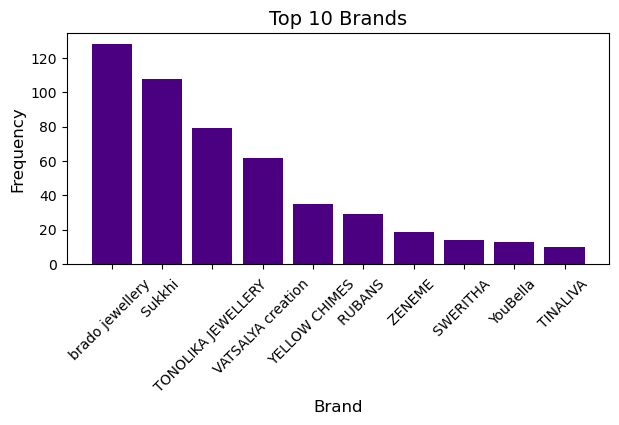

In [91]:
top_10_brands = df['Brand'].value_counts().head(10).reset_index()
top_10_brands.columns = ['Brand', 'Frequency']  
# Plot the top 10 brands
plt.figure(figsize=(7,3))
plt.bar(top_10_brands['Brand'], top_10_brands['Frequency'], color='indigo')
plt.title('Top 10 Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


<Axes: title={'center': 'Top 10 Colors in Jewelry'}, xlabel='Color'>

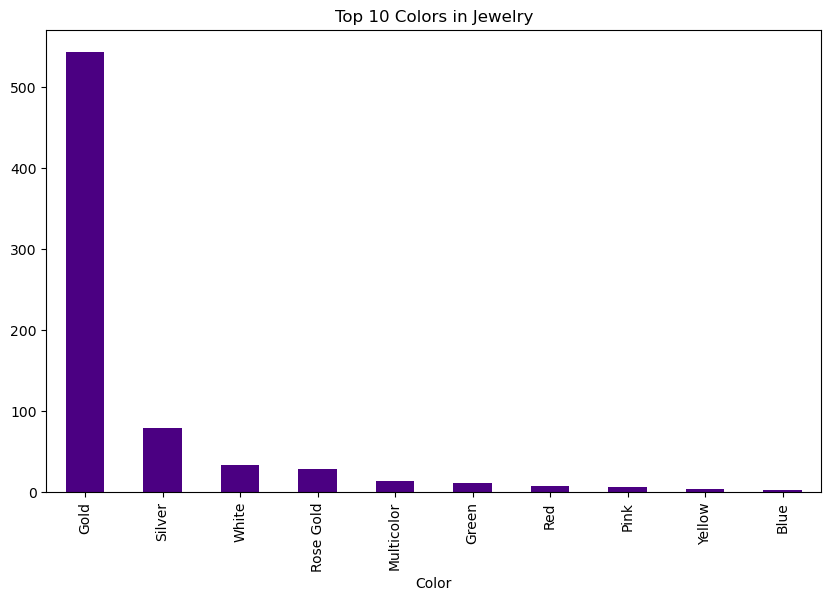

In [99]:
top_10_colors = df['Color'].value_counts().head(10)

top_10_colors.plot(kind='bar', x='Color', y='Frequency', color='indigo', figsize=(10, 6), title='Top 10 Colors in Jewelry')


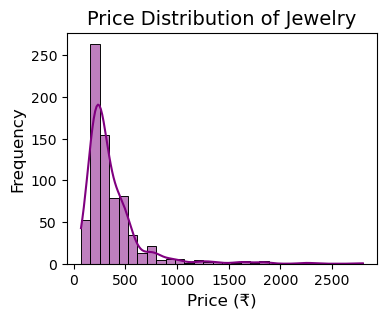

In [101]:
plt.figure(figsize=(4,3))
sns.histplot(df['Price'], bins=30, kde=True, color='purple')

plt.title('Price Distribution of Jewelry', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Bivariate analysis

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


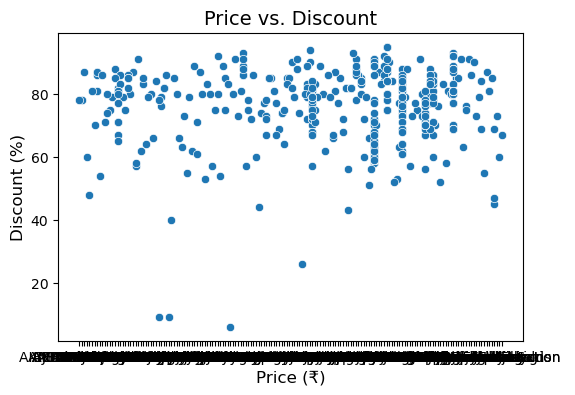

In [104]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Brand', y='Offer')
plt.title('Price vs. Discount', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Discount (%)', fontsize=12)
sns.regplot(data=df,x='Brand',y='Offer',scatter=False,color='red')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16748\1329939241.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Price', y='Material', palette='Set2')


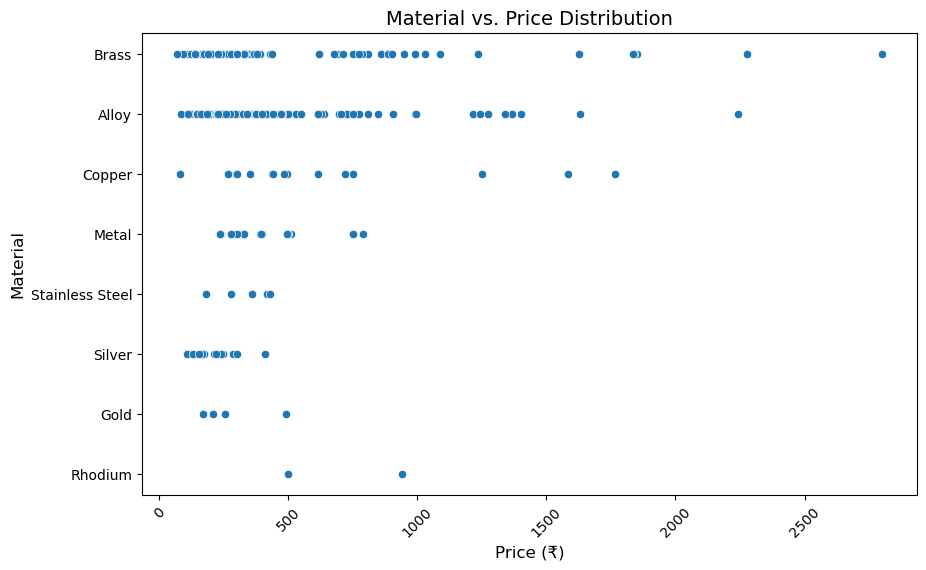

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Material', palette='Set2')
plt.xticks(rotation=45)
plt.title('Material vs. Price Distribution', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Material', fontsize=12)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16748\4160431393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_prices.index, y=median_prices.values, palette='Set2')


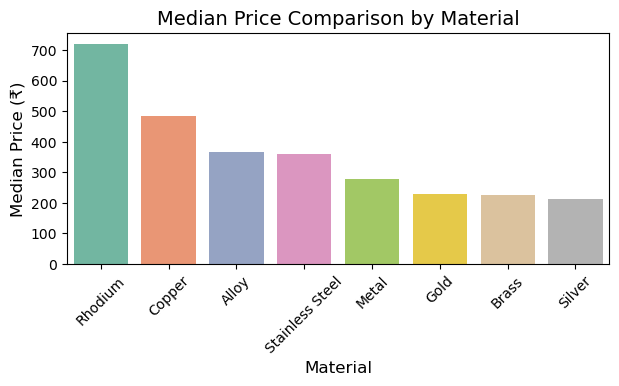

In [108]:
# Grouping data by Material and calculating median price
median_prices = df.groupby('Material')['Price'].median().sort_values(ascending=False)

# Plotting the median prices
plt.figure(figsize=(7,3))
sns.barplot(x=median_prices.index, y=median_prices.values, palette='Set2')

plt.title('Median Price Comparison by Material', fontsize=14)
plt.xlabel('Material', fontsize=12)
plt.ylabel('Median Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.show()



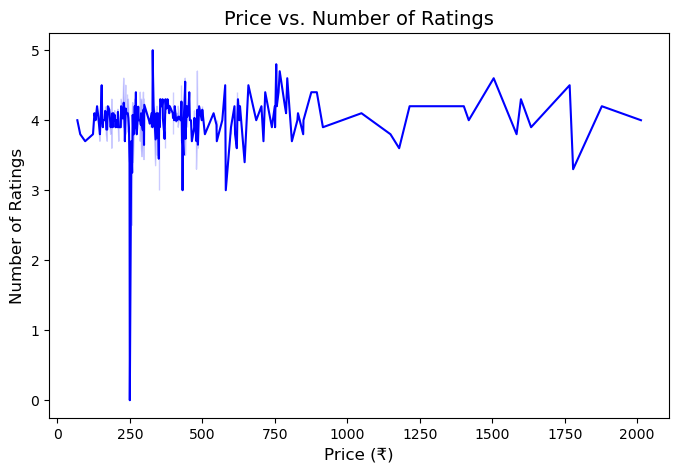

In [701]:
'plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Price', y='Rating', color='blue')
plt.title('Price vs. Number of Ratings', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.show()


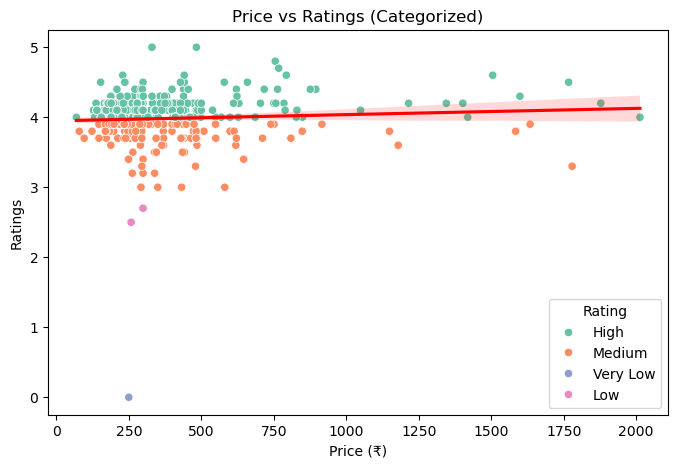

In [702]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to categorize ratings
def rating_category(rating):
    if rating < 2:
        return "Very Low"
    elif rating < 3:
        return "Low"
    elif rating < 4:
        return "Medium"
    else:
        return "High"

# Scatter plot with categorical hue (without modifying df)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Material', hue=df['Rating'].apply(rating_category), palette='Set2')
sns.regplot(data=df,x='Price',y='Rating',scatter=False,color='red')
plt.title('Price vs Ratings (Categorized)')
plt.xlabel('Price (₹)')
plt.ylabel('Ratings')
plt.show()


<Axes: >

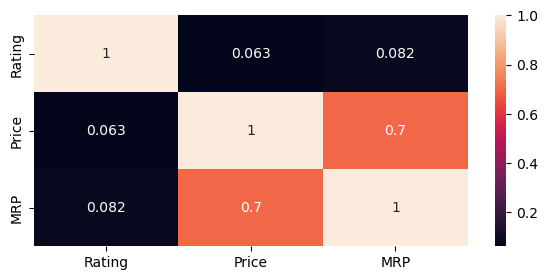

In [923]:
df_cleaned = pd.read_csv("cleaned_Data.csv")  # Replace with actual file path
df_cleaned.to_csv("cleaned_Data.csv",index=False)
plt.figure(figsize=(7,3))
sns.heatmap(df[['Rating','Price','MRP']].corr(),annot=True)

<Figure size 700x300 with 0 Axes>

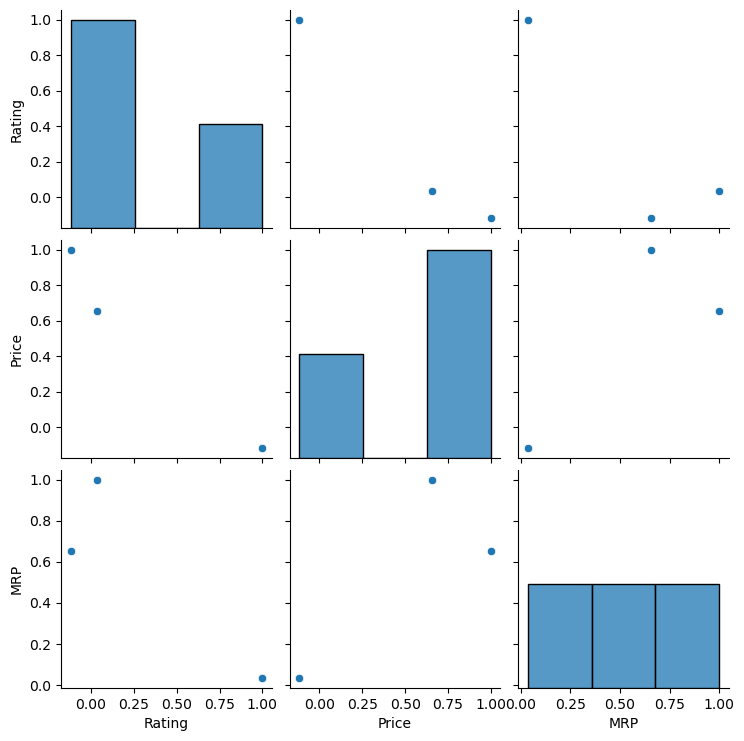

In [120]:
plt.figure(figsize=(7,3))
sns.pairplot(df[['Rating','Price','MRP']].corr())

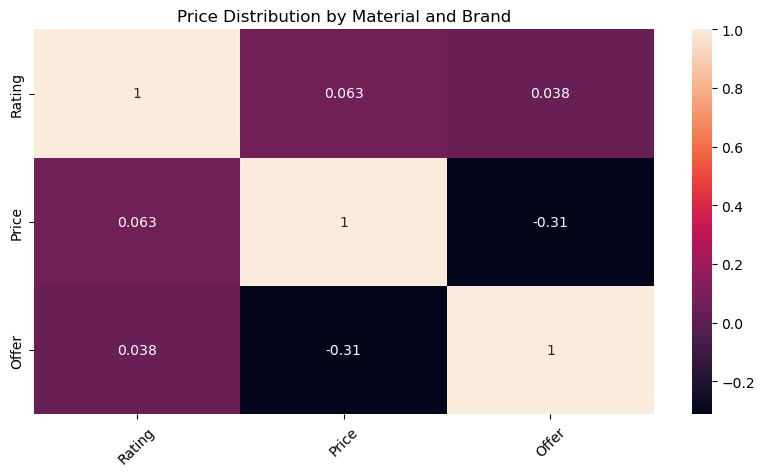

In [709]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Rating','Price','Offer']].corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Price Distribution by Material and Brand")
plt.show()

In [757]:
top_10_brands

,Brand,Frequency
0,brado jewellery,148
1,Sukkhi,59
2,VATSALYA creation,50
3,YELLOW CHIMES,37
4,RUBANS,31
5,Divastri,22
6,ZENEME,21
7,TONOLIKA JEWELLERY,17
8,SWERITHA,14
9,Eivri,9


In [3]:
top_10_brands = df.groupby("top_10_brands")["Rating"].mean().nlargest(10)
top_10_brands.columns = ['Brand', 'Frequency']  
# Plot the top 10 brands
plt.figure(figsize=(7,3))
plt.bar(top_10_brands['Brand'], top_10_brands['Frequency'], color='indigo')
plt.title('Top 10 Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


NameError: name 'df' is not defined

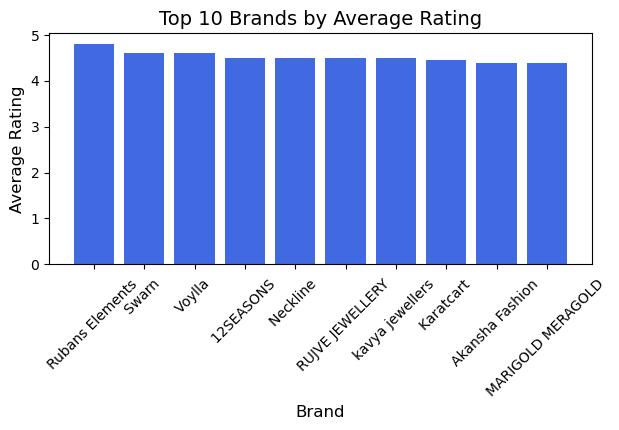

In [819]:


# Load the dataset
df = pd.read_csv("cleaned_Data.csv")

# Group by Brand and calculate the average rating
top_10_brands = df.groupby("Brand")["Rating"].mean().nlargest(10).reset_index()

# Plot the top 10 brands by rating
plt.figure(figsize=(7, 3))
plt.bar(top_10_brands['Brand'], top_10_brands['Rating'], color='royalblue')

plt.title('Top 10 Brands by Average Rating', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)  

# Show the plot
plt.show()


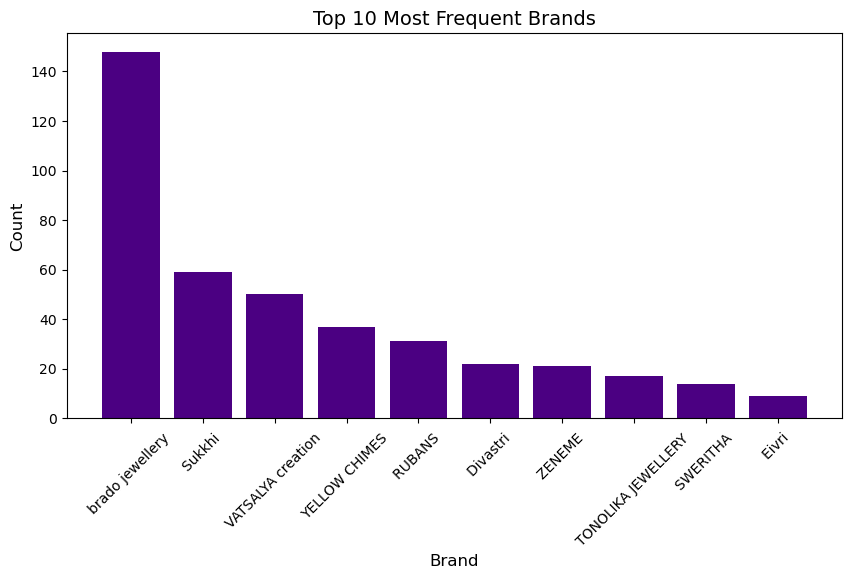

In [777]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_Data.csv")

# Get the top 10 most frequent brands
top_10_brands = df["Brand"].value_counts().nlargest(10).reset_index()
top_10_brands.columns = ['Brand', 'Frequency']

# Plot the top 10 brands using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_10_brands['Brand'], top_10_brands['Frequency'], color='indigo')

plt.title('Top 10 Most Frequent Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  

# Show the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12612\1982746873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Brand", y="Offer", palette="dark")


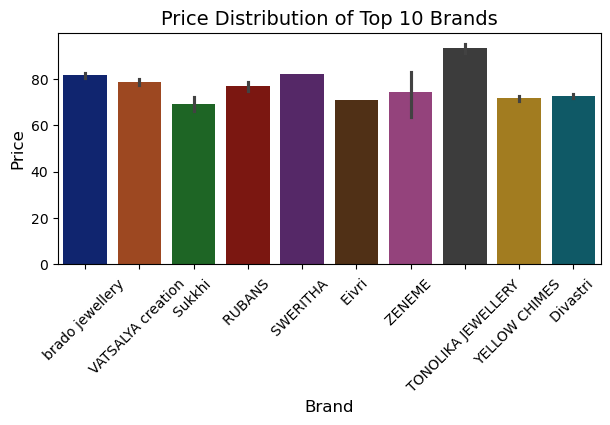

In [825]:


# Load dataset
df = pd.read_csv("cleaned_Data.csv")

# Get top 10 brands by number of listings
top_10_brands = df["Brand"].value_counts().nlargest(10).index
filtered_df = df[df["Brand"].isin(top_10_brands)]

# Box plot for price distribution per brand
plt.figure(figsize=(7,3))
sns.barplot(data=filtered_df, x="Brand", y="Offer", palette="dark")

# Labels and title
plt.title("Price Distribution of Top 10 Brands", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45)

plt.show()


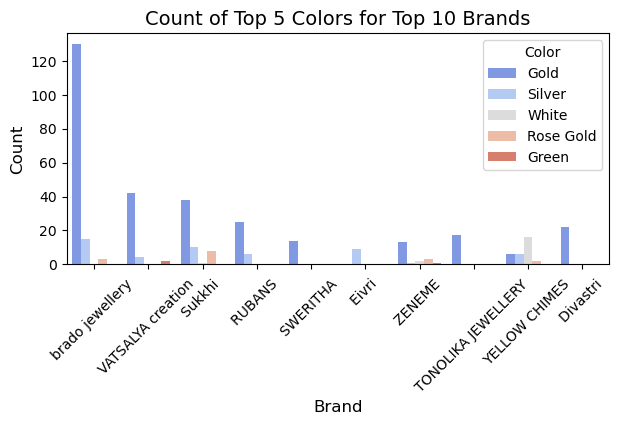

In [865]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_Data.csv")

# Get top 10 brands by number of listings
top_10_brands = df["Brand"].value_counts().nlargest(10).index
filtered_df = df[df["Brand"].isin(top_10_brands)]

# Get top 5 most common colors
top_5_colors = df["Color"].value_counts().nlargest(5).index
filtered_df = filtered_df[filtered_df["Color"].isin(top_5_colors)]

# Count plot for Brand vs Color
plt.figure(figsize=(7,3))
sns.countplot(data=filtered_df, x="Brand", hue="Color", palette="coolwarm")

# Labels and title
plt.title("Count of Top 5 Colors for Top 10 Brands", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Color")

plt.show()


In [877]:
top_3_colors = df["Color"].value_counts().nlargest(3)


In [879]:
top_3_colors

Color
Gold      409
Silver     64
White      26
Name: count, dtype: int64

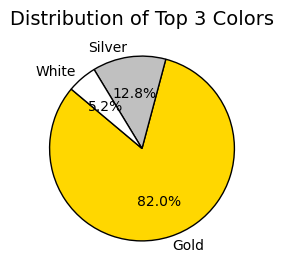

In [895]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_Data.csv")

# Get top 3 most common colors
top_3_colors = df["Color"].value_counts().nlargest(3)

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(
    top_3_colors, 
    labels=top_3_colors.index, 
    autopct="%1.1f%%", 
    colors=["gold", "silver", "white"],  # Change colors based on top colors
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)

# Title
plt.title("Distribution of Top 3 Colors", fontsize=14)

# Show plot
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

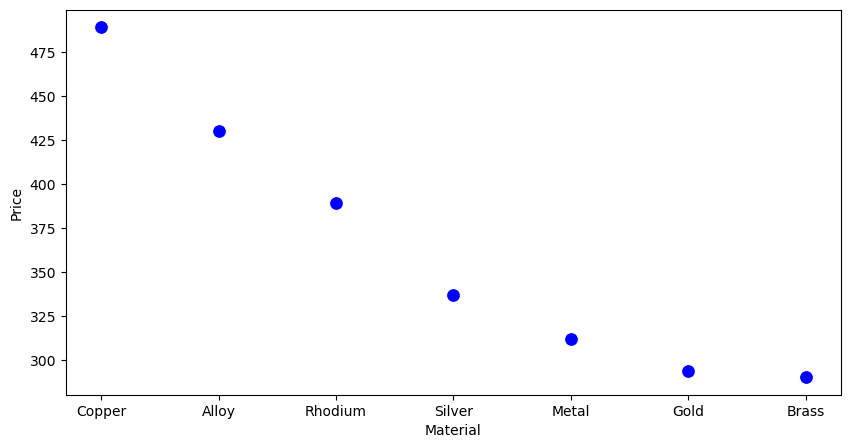

In [907]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_Data.csv")

# Get top 10 materials by frequency
top_10_materials = df["Material"].value_counts().nlargest(10).index

# Filter dataset for only these top 10 materials
filtered_df = df[df["Material"].isin(top_10_materials)]

# Create pivot table (Material vs Average Price)
pivot_table = filtered_df.pivot_table(index="Material", values="Price", aggfunc="mean")

# Sort the table by price for better visualization
pivot_table = pivot_table.sort_values(by="Price", ascending=False)

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pivot_table.index, y=pivot_table["Price"], color="blue", s=100)
sns.regplot(data=df,x='Price',y='Material',scatter=False,color='red')
plt.title("Scatter Plot of Top 10 Materials vs Average Price", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12612\3552212385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Material", y="Price", palette="viridis")


<Axes: xlabel='Material', ylabel='Price'>

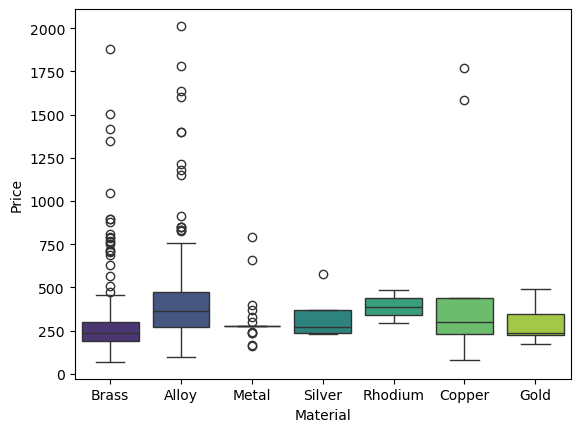

In [911]:
import seaborn as sns
sns.boxplot(data=df, x="Material", y="Price", palette="viridis")
